In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np

# Load the .content file
def load_content_file(file_path):
    data = []
    with open(file_path, 'r') as file:
        for line in file:
            split_line = line.strip().split()
            paper_id = split_line[0]
            attributes = list(map(int, split_line[1:-1]))
            class_label = split_line[-1]
            data.append([paper_id] + attributes + [class_label])

    # Create DataFrame
    df = pd.DataFrame(data)

    # Extract features and labels
    paper_ids = df.iloc[:, 0].values
    features = df.iloc[:, 1:-1].values
    labels = df.iloc[:, -1].values

    return df, paper_ids, features, labels

# Path to the .content file
content_file_path = '/content/drive/MyDrive/cora.content'
df_content, paper_ids, features, labels = load_content_file(content_file_path)

print("Content file loaded.")
print(df_content.head())


Content file loaded.
      0     1     2     3     4     5     6     7     8     9     ...  1425  \
0    31336     0     0     0     0     0     0     0     0     0  ...     0   
1  1061127     0     0     0     0     0     0     0     0     0  ...     0   
2  1106406     0     0     0     0     0     0     0     0     0  ...     0   
3    13195     0     0     0     0     0     0     0     0     0  ...     0   
4    37879     0     0     0     0     0     0     0     0     0  ...     0   

   1426  1427  1428  1429  1430  1431  1432  1433                    1434  
0     0     1     0     0     0     0     0     0         Neural_Networks  
1     1     0     0     0     0     0     0     0           Rule_Learning  
2     0     0     0     0     0     0     0     0  Reinforcement_Learning  
3     0     0     0     0     0     0     0     0  Reinforcement_Learning  
4     0     0     0     0     0     0     0     0   Probabilistic_Methods  

[5 rows x 1435 columns]


In [ ]:
import pandas as pd

# Load content data using tab as the delimiter
content_file_path = '/content/drive/MyDrive/cora.content'
content_df = pd.read_csv(content_file_path, sep='\t', header=None)

# Print the first few rows to verify
print(content_df.head())
print(content_df.shape)

# Extract features and labels
features = content_df.iloc[:, 1:-1].values  # All columns except the first and last
labels = content_df.iloc[:, -1].values  # Last column

print("Feature matrix shape:", features.shape)
print("Sample features:", features[:5])
print("Labels shape:", labels.shape)

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)
print("Encoded labels shape:", encoded_labels.shape)
print("Sample encoded labels:", encoded_labels[:5])

# Convert to tensors
import torch
features = torch.tensor(features, dtype=torch.float)
labels = torch.tensor(encoded_labels, dtype=torch.long)


      0     1     2     3     4     5     6     7     8     9     ...  1425  \
0    31336     0     0     0     0     0     0     0     0     0  ...     0   
1  1061127     0     0     0     0     0     0     0     0     0  ...     0   
2  1106406     0     0     0     0     0     0     0     0     0  ...     0   
3    13195     0     0     0     0     0     0     0     0     0  ...     0   
4    37879     0     0     0     0     0     0     0     0     0  ...     0   

   1426  1427  1428  1429  1430  1431  1432  1433                    1434  
0     0     1     0     0     0     0     0     0         Neural_Networks  
1     1     0     0     0     0     0     0     0           Rule_Learning  
2     0     0     0     0     0     0     0     0  Reinforcement_Learning  
3     0     0     0     0     0     0     0     0  Reinforcement_Learning  
4     0     0     0     0     0     0     0     0   Probabilistic_Methods  

[5 rows x 1435 columns]
(2708, 1435)
Feature matrix shape: (2708, 14

In [ ]:
import pandas as pd

# Load paper IDs from the .content file
def load_paper_ids_from_content(file_path):
    paper_ids = set()
    with open(file_path, 'r') as file:
        for line in file:
            paper_id = line.strip().split()[0]
            paper_ids.add(paper_id)
    return paper_ids

# Load paper IDs from the .cites file
def load_paper_ids_from_cites(file_path):
    paper_ids = set()
    with open(file_path, 'r') as file:
        for line in file:
            cited_id, citing_id = line.strip().split()
            paper_ids.add(cited_id)
            paper_ids.add(citing_id)
    return paper_ids

# Paths to the .content and .cites files
content_file_path = '/content/drive/MyDrive/cora.content'
cites_file_path = '/content/drive/MyDrive/cora.cites'

# Extract paper IDs
content_paper_ids = load_paper_ids_from_content(content_file_path)
cites_paper_ids = load_paper_ids_from_cites(cites_file_path)

# Check if all paper IDs in content are in cites
missing_in_cites = content_paper_ids - cites_paper_ids
missing_in_content = cites_paper_ids - content_paper_ids

if not missing_in_cites and not missing_in_content:
    print("All paper IDs match between .content and .cites files.")
else:
    if missing_in_cites:
        print(f"Paper IDs in .content but not in .cites: {missing_in_cites}")
    if missing_in_content:
        print(f"Paper IDs in .cites but not in .content: {missing_in_content}")


All paper IDs match between .content and .cites files.


In [ ]:
import networkx as nx

# Load the .cites file
def load_cites_file(file_path):
    edges = []
    with open(file_path, 'r') as file:
        for line in file:
            cited_paper, citing_paper = line.strip().split()
            edges.append((citing_paper, cited_paper))  # Note: edge direction is from citing to cited

    # Create a graph
    G = nx.DiGraph()
    G.add_edges_from(edges)

    return G

# Path to the .cites file
cites_file_path = '/content/drive/MyDrive/cora.cites'
graph = load_cites_file(cites_file_path)

print("Cites file loaded.")
print(f"Number of nodes: {len(graph.nodes)}")
print(f"Number of edges: {len(graph.edges)}")


Cites file loaded.
Number of nodes: 2708
Number of edges: 5429


In [ ]:
!pip install torch-geometric


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 26.9 MB/s eta 0:00:00


In [ ]:
!pip install torch torchvision torchaudio


In [ ]:
import pandas as pd
import numpy as np
import torch
from torch_geometric.data import Data

# Load the content data
content_df = pd.read_csv('/content/drive/MyDrive/cora.content', sep='\t', header=None)
content_df.columns = ['paper_id'] + [f'word_{i}' for i in range(content_df.shape[1] - 2)] + ['class_label']

# Convert paper IDs to strings
content_df['paper_id'] = content_df['paper_id'].astype(str)

# Create mapping from paper ID to index
id_to_index = {id_: idx for idx, id_ in enumerate(content_df['paper_id'].unique())}
index_to_id = {idx: id_ for id_, idx in id_to_index.items()}

# Load the citation data
citation_df = pd.read_csv('/content/drive/MyDrive/cora.cites', sep='\t', header=None)
citation_df.columns = ['cited_paper', 'citing_paper']

# Convert paper IDs to strings
citation_df['cited_paper'] = citation_df['cited_paper'].astype(str)
citation_df['citing_paper'] = citation_df['citing_paper'].astype(str)

# Filter and update edge indices
valid_edges = []
for _, row in citation_df.iterrows():
    if row['cited_paper'] in id_to_index and row['citing_paper'] in id_to_index:
        valid_edges.append([id_to_index[row['cited_paper']], id_to_index[row['citing_paper']]])

# Convert valid edges to tensor
edge_index = torch.tensor(np.array(valid_edges).T, dtype=torch.long)

# Filter content data based on valid paper IDs
valid_content_df = content_df[content_df['paper_id'].isin(id_to_index.keys())]

# Define label encoding mapping
unique_labels = valid_content_df['class_label'].unique()
label_encoding = {label: idx for idx, label in enumerate(unique_labels)}

# Update features and labels based on valid content data
features = torch.tensor(valid_content_df.iloc[:, 1:-1].values, dtype=torch.float)
labels = torch.tensor(valid_content_df['class_label'].map(label_encoding).values, dtype=torch.long)

# Create Data object
data = Data(x=features, edge_index=edge_index, y=labels)

print("Updated Data object created.")
print("Features shape:", data.x.shape)
print("Edge index shape:", data.edge_index.shape)
print("Labels shape:", data.y.shape)


Updated Data object created.
Features shape: torch.Size([2708, 1433])
Edge index shape: torch.Size([2, 5429])
Labels shape: torch.Size([2708])


In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, 64, heads=8)
        self.conv2 = GATConv(64 * 8, 128, heads=8)
        self.conv3 = GATConv(128 * 8, 256, heads=8)
        self.conv4 = GATConv(256 * 8, 512, heads=8)
        self.conv5 = GATConv(512 * 8, 256, heads=8)
        self.conv6 = GATConv(256 * 8, num_classes)


    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create the model
model = GAT(num_features=1433, num_classes=len(label_encoding))

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

# Run training for a few epochs
for epoch in range(400):
    loss = train()
    print(f'Epoch {epoch+1}, Loss: {loss:.4f}')


Epoch 1, Loss: 6.9373
Epoch 2, Loss: 5.3042
Epoch 3, Loss: 2.8328
Epoch 4, Loss: 1.4846
Epoch 5, Loss: 0.9634
Epoch 6, Loss: 1.0561
Epoch 7, Loss: 0.9411
Epoch 8, Loss: 0.7924
Epoch 9, Loss: 0.8675
Epoch 10, Loss: 0.9662
Epoch 11, Loss: 0.8062
Epoch 12, Loss: 0.8004
Epoch 13, Loss: 0.7615
Epoch 14, Loss: 0.6872
Epoch 15, Loss: 0.6906
Epoch 16, Loss: 0.6122
Epoch 17, Loss: 0.6213
Epoch 18, Loss: 0.6393
Epoch 19, Loss: 0.6299
Epoch 20, Loss: 0.6205
Epoch 21, Loss: 0.5508
Epoch 22, Loss: 0.5491
Epoch 23, Loss: 0.5349
Epoch 24, Loss: 0.5455
Epoch 25, Loss: 0.5365
Epoch 26, Loss: 0.4963
Epoch 27, Loss: 0.4669
Epoch 28, Loss: 0.4858
Epoch 29, Loss: 0.5206
Epoch 30, Loss: 0.5023
Epoch 31, Loss: 0.4986
Epoch 32, Loss: 0.4496
Epoch 33, Loss: 0.4289
Epoch 34, Loss: 0.4040
Epoch 35, Loss: 0.4476
Epoch 36, Loss: 0.4289
Epoch 37, Loss: 0.4350
Epoch 38, Loss: 0.3897
Epoch 39, Loss: 0.4044
Epoch 40, Loss: 0.3699
Epoch 41, Loss: 0.3609
Epoch 42, Loss: 0.3443
Epoch 43, Loss: 0.3668
Epoch 44, Loss: 0.40

In [ ]:
def evaluate(model, data):
    model.eval()  # Set the model to evaluation mode
    with torch.no_grad():
        # Forward pass
        out = model(data.x, data.edge_index)
        # Get predicted labels by taking the index with the highest score
        pred = out.max(dim=1)[1]
        # Calculate accuracy
        correct = pred.eq(data.y).sum().item()
        accuracy = correct / len(data.y)
    return accuracy
# Evaluate the model
accuracy = evaluate(model, data)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.9963


I decided to plot the training vs validation loss graph

*   Initial phase
Both the training loss and validation loss rapidly decrease which indicates that the model is learning well in the initial epochs.
*   Later phase
The training loss stabilizes, but stays consistently higher than the validation loss. This is not typical, as normally training loss would continue decreasing or match validation loss. One possibility is that dropout is heavily regularizing the model.
The validation loss shows smooth convergence and remains low, indicating that the model is learning well and generalizing properly on the validation set.



Validation Accuracy


*   Steady increase: The validation accuracy rapidly increases and reaches ~99.5% after about 100 epochs, continuing to gradually improve until stabilizing near 99.6%.
*   Small dips: There are minor drops in accuracy around epochs 100 and 150, which is typical as the model adjusts and refines its understanding of the data.





*   No Overfitting: There is no clear sign of overfitting, as the training loss does not decrease below the validation loss. Validation accuracy keeps increasing, which indicates good generalization.

*   Excellent Performance: The model achieves high accuracy (around 99.6%), which suggests the model is performing very well on the task.


Epoch 1, Train Loss: 6.9480, Val Loss: 5.4034, Val Acc: 0.4694
Epoch 2, Train Loss: 5.3411, Val Loss: 2.8208, Val Acc: 0.4612
Epoch 3, Train Loss: 2.7353, Val Loss: 1.3441, Val Acc: 0.5085
Epoch 4, Train Loss: 1.4826, Val Loss: 0.8155, Val Acc: 0.8124
Epoch 5, Train Loss: 1.0025, Val Loss: 0.8172, Val Acc: 0.7843
Epoch 6, Train Loss: 1.0668, Val Loss: 0.7531, Val Acc: 0.8072
Epoch 7, Train Loss: 0.9956, Val Loss: 0.5251, Val Acc: 0.8637
Epoch 8, Train Loss: 0.7546, Val Loss: 0.4879, Val Acc: 0.8552
Epoch 9, Train Loss: 0.7766, Val Loss: 0.5113, Val Acc: 0.8416
Epoch 10, Train Loss: 1.0297, Val Loss: 0.4891, Val Acc: 0.8560
Epoch 11, Train Loss: 0.8486, Val Loss: 0.4430, Val Acc: 0.8626
Epoch 12, Train Loss: 0.7420, Val Loss: 0.4243, Val Acc: 0.8704
Epoch 13, Train Loss: 0.7284, Val Loss: 0.4404, Val Acc: 0.8696
Epoch 14, Train Loss: 0.7126, Val Loss: 0.4670, Val Acc: 0.8582
Epoch 15, Train Loss: 0.7354, Val Loss: 0.4592, Val Acc: 0.8619
Epoch 16, Train Loss: 0.6732, Val Loss: 0.4077, V

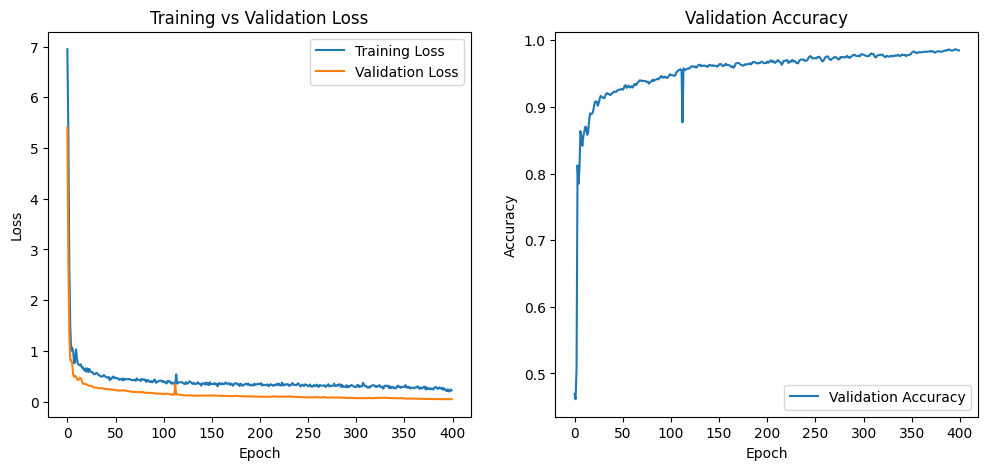

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv
import matplotlib.pyplot as plt

# Define GAT model
class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, 64, heads=8)
        self.conv2 = GATConv(64 * 8, 128, heads=8)
        self.conv3 = GATConv(128 * 8, 256, heads=8)
        self.conv4 = GATConv(256 * 8, 512, heads=8)
        self.conv5 = GATConv(512 * 8, 256, heads=8)
        self.conv6 = GATConv(256 * 8, num_classes)

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        return F.log_softmax(x, dim=1)

# Create the model
model = GAT(num_features=1433, num_classes=len(label_encoding))

# Define loss function and optimizer
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Training loop with validation
def train():
    model.train()
    optimizer.zero_grad()
    out = model(data.x, data.edge_index)
    loss = criterion(out, data.y)
    loss.backward()
    optimizer.step()
    return loss.item()

def validate():
    model.eval()
    with torch.no_grad():
        out = model(data.x, data.edge_index)
        val_loss = criterion(out, data.y).item()
        correct = out.argmax(dim=1).eq(data.y).sum().item()
        val_acc = correct / data.y.size(0)
    return val_loss, val_acc

# Initialize lists to store the training/validation metrics
train_losses = []
val_losses = []
val_accuracies = []

# Run training for a few epochs and track training and validation losses/accuracy
for epoch in range(400):
    train_loss = train()
    val_loss, val_acc = validate()

    train_losses.append(train_loss)
    val_losses.append(val_loss)
    val_accuracies.append(val_acc)

    print(f'Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.4f}')

# Plot training and validation losses over epochs
plt.figure(figsize=(12, 5))

# Plot loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training vs Validation Loss')
plt.legend()

# Plot accuracy
plt.subplot(1, 2, 2)
plt.plot(val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy')
plt.legend()

plt.show()


Now we have to extract the second last layer and apply GAT to it . The GAT model contains 6 layers.

Step 1: Stored the value of the second last layer in a variable

In [ ]:
import torch
import torch.nn.functional as F
from torch_geometric.nn import GATConv

class GAT(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(GAT, self).__init__()
        self.conv1 = GATConv(num_features, 64, heads=8)
        self.conv2 = GATConv(64 * 8, 128, heads=8)
        self.conv3 = GATConv(128 * 8, 256, heads=8)
        self.conv4 = GATConv(256 * 8, 512, heads=8)
        self.conv5 = GATConv(512 * 8, 256, heads=8)  # Second last layer
        self.conv6 = GATConv(256 * 8, num_classes)    # Final output layer

    def forward(self, x, edge_index):
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv1(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv2(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv3(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv4(x, edge_index)
        x = F.elu(x)
        x = F.dropout(x, p=0.6, training=self.training)

        x = self.conv5(x, edge_index)  # Second last layer output
        x = F.elu(x)  # Apply activation function (ELU)

        self.second_last_layer_output = x  # Save the second last layer output for later

        x = F.dropout(x, p=0.6, training=self.training)
        x = self.conv6(x, edge_index)  # Final output layer
        return F.log_softmax(x, dim=1)

# Create the model
model = GAT(num_features=1433, num_classes=len(label_encoding))


Step 2:Extracted the node embeddings from the second last layer

In [ ]:
# Put the model in evaluation mode
model.eval()

# Run the forward pass without calculating gradients
with torch.no_grad():
    output = model(data.x, data.edge_index)  # Forward pass
    embeddings = model.second_last_layer_output  # Extract the second last layer's output


Printing a similariy graph
Helps visualize or understand the relationshops and structure within a graph.

In [ ]:
import networkx as nx
from scipy.sparse import coo_matrix

# Convert edge_index to a scipy sparse matrix (COO format)
row = data.edge_index[0].cpu().numpy()
col = data.edge_index[1].cpu().numpy()
values = torch.ones(row.shape[0]).cpu().numpy()  # Assuming the graph is unweighted, otherwise use weights

# Create a sparse matrix
adj_matrix = coo_matrix((values, (row, col)), shape=(data.num_nodes, data.num_nodes))

# Convert to a NetworkX graph
G = nx.from_scipy_sparse_array(adj_matrix)

# Print the graph
print(G)


Graph with 2708 nodes and 5278 edges


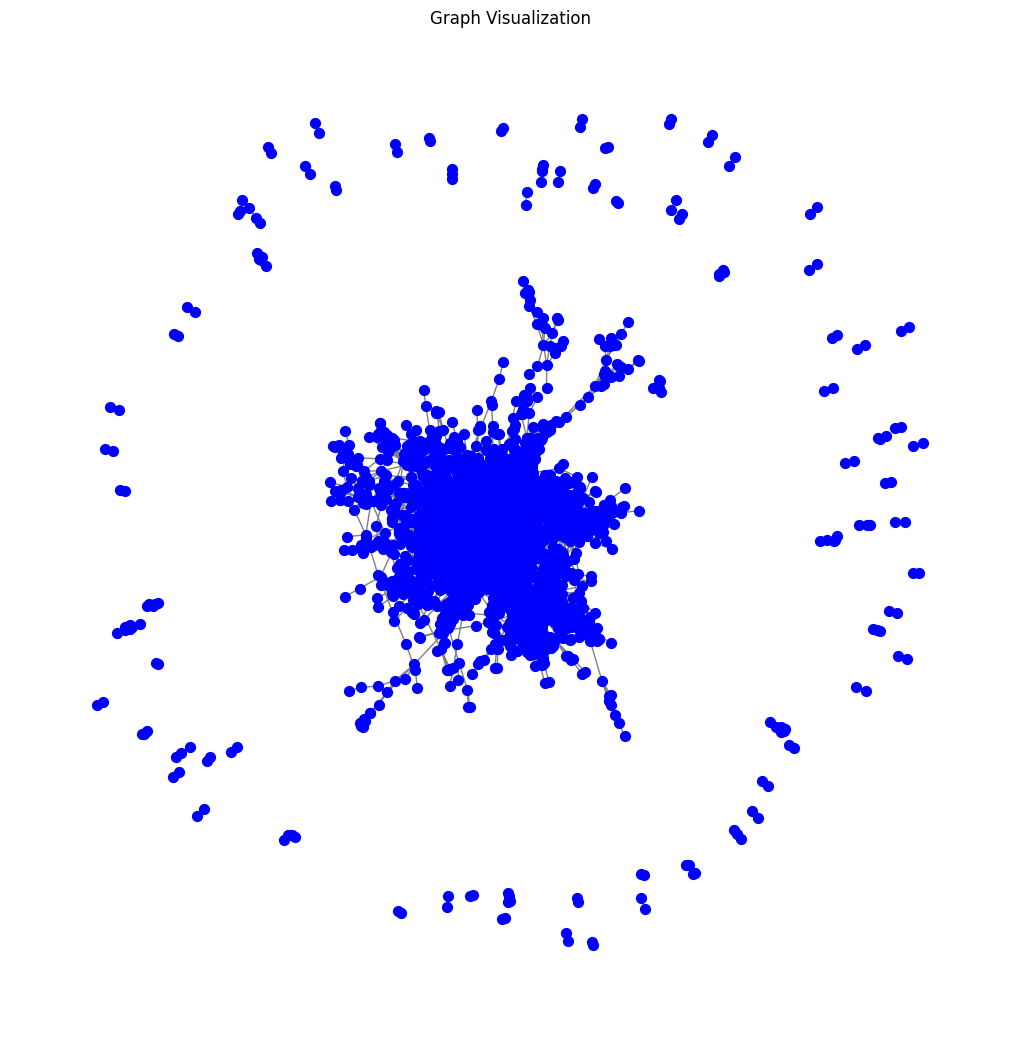

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix

# Convert edge_index to a scipy sparse matrix (COO format)
row = data.edge_index[0].cpu().numpy()
col = data.edge_index[1].cpu().numpy()
values = torch.ones(row.shape[0]).cpu().numpy()  # Assuming the graph is unweighted, otherwise use weights

# Create a sparse matrix
adj_matrix = coo_matrix((values, (row, col)), shape=(data.num_nodes, data.num_nodes))

# Convert to a NetworkX graph
G = nx.from_scipy_sparse_array(adj_matrix)

# Plot the graph
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Positions for all nodes, seed for reproducibility
nx.draw(G, pos, node_size=50, node_color='blue', with_labels=False, edge_color='gray')
plt.title("Graph Visualization")
plt.show()


Step 3:Applying Louvain algorithm

In [ ]:
!pip install python-louvain


Node 0 is assigned to community 0
Node 1 is assigned to community 1
Node 2 is assigned to community 2
Node 3 is assigned to community 2
Node 4 is assigned to community 3
Node 5 is assigned to community 3
Node 6 is assigned to community 13
Node 7 is assigned to community 0
Node 8 is assigned to community 0
Node 9 is assigned to community 5
Node 10 is assigned to community 6
Node 11 is assigned to community 7
Node 12 is assigned to community 8
Node 13 is assigned to community 13
Node 14 is assigned to community 0
Node 15 is assigned to community 7
Node 16 is assigned to community 2
Node 17 is assigned to community 7
Node 18 is assigned to community 7
Node 19 is assigned to community 12
Node 20 is assigned to community 5
Node 21 is assigned to community 2
Node 22 is assigned to community 10
Node 23 is assigned to community 11
Node 24 is assigned to community 2
Node 25 is assigned to community 5
Node 26 is assigned to community 7
Node 27 is assigned to community 8
Node 28 is assigned to co

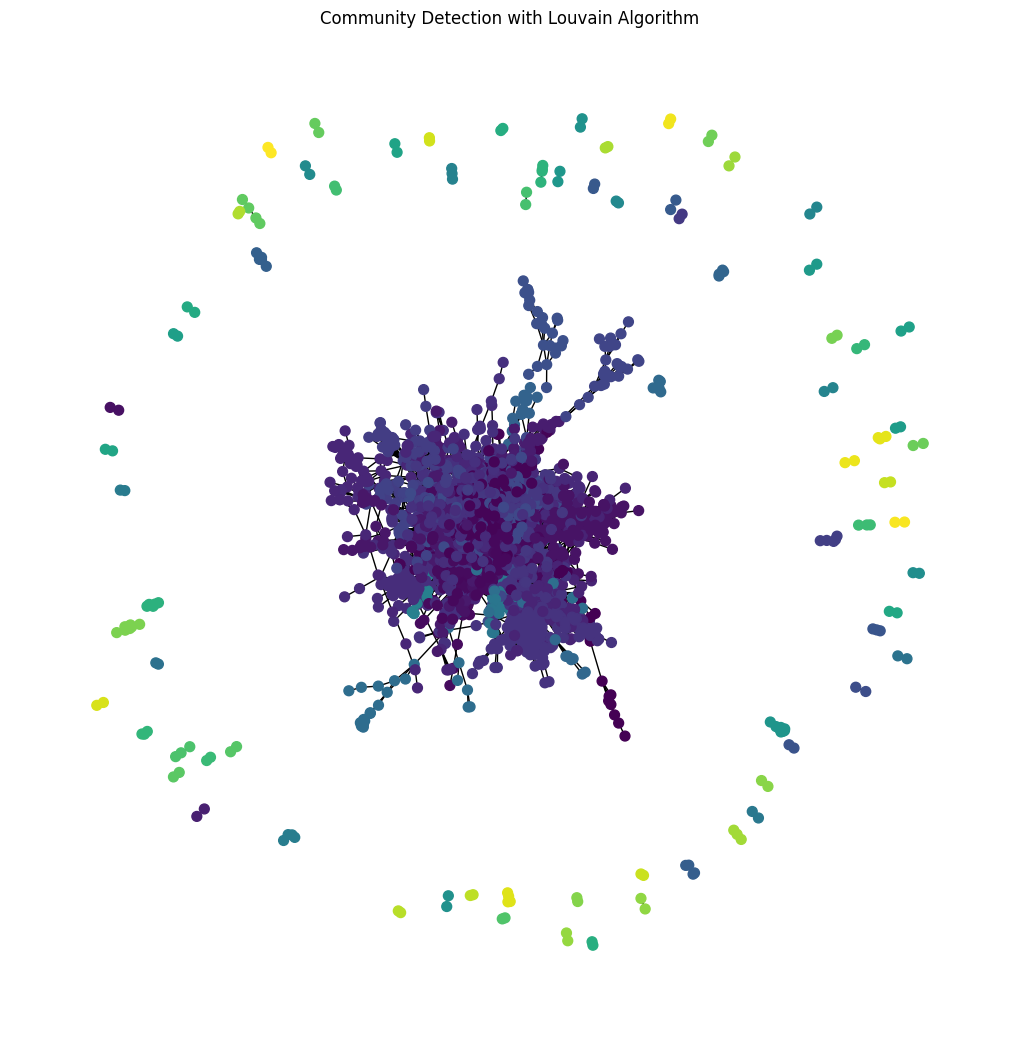

In [ ]:
import community.community_louvain as community_louvain
import networkx as nx
import matplotlib.pyplot as plt

# Apply Louvain algorithm to detect communities
partition = community_louvain.best_partition(G)

# 'partition' is a dictionary where keys are node IDs and values are community assignments
for node, community in partition.items():
    print(f'Node {node} is assigned to community {community}')

# Optionally, visualize the communities
plt.figure(figsize=(10, 10))
pos = nx.spring_layout(G, seed=42)  # Positioning of nodes
cmap = plt.get_cmap('viridis')  # Color map

# Draw the graph with node colors based on community assignment
nx.draw(G, pos, node_color=[partition[node] for node in G.nodes()], node_size=50, cmap=cmap, with_labels=False)
plt.title("Community Detection with Louvain Algorithm")
plt.show()
